# Deepdive into Boston and Airbnb Data

## CRISP DM Process

**1. Business Understanding** Airbnb is in property rental business, we want to do a comparative analysis for Boston and Seattle Market differ in various aspects and following are the important question to answer

1. Is there any significant difference between Seattle and Boston AirBnB Homes. 
    1. How Prices in these Markets are vary in terms of Property Type , Room Type , Long Stay Property vs Short Stay Property
    2. How seasonality is impacting Pricing and Inventory Availability for both cities
    3. Do High Value Amenities varies for both the cities
2.  Which  are the neighbourhoods which are getting high reviews but there is shortage of inventory leading to increase in price.

3. What are the Key Features that are impacting rental pricing prediction for these cities ?  Are these features vary between cities

**2.Data Understanding** Boston dataset consists of **3146** listings while Seattle's has **4213** listings. Datasets were investigated before any preprocessing.

**3.Prepare Data** Following Techniques are used :
    1. Cleaning Dataframe
    2. Removing NaN
    3. Outlier Removal
    
    
**4.Data Modeling** Linear Regression model is used for seperatly for boston and seattle

**5.Evaluate the Results** Result and discussion are published in 

In [38]:
#Importing Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

**Data Pre-Processing Boston City**

In [13]:
#Reading Data
df_listings_boston = pd.read_csv(r'Boston Data\listings (1).csv.gz', compression = 'gzip',error_bad_lines=False)

df_listings_boston.shape

(3146, 74)

In [14]:
#Subsetting Dataframe
df_listings1_boston = df_listings_boston[['host_since','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','latitude','longitude','property_type','room_type','amenities','price','minimum_nights','maximum_nights','has_availability','availability_365','number_of_reviews','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','id','name','host_id','host_name',
'host_listings_count','accommodates','bathrooms','bedrooms','beds']]


In [15]:
#Cleaning Data

#Price Column - Removing Special Characters 
df_listings1_boston['price'] = df_listings1_boston['price'].str.replace('$','')
df_listings1_boston['price'] = df_listings1_boston['price'].str.replace(',','')
df_listings1_boston['price'] = df_listings1_boston['price'].str.replace('.00','')
df_listings1_boston['price'] = pd.to_numeric(df_listings1_boston['price'])

In [16]:
#host_response_rate and host_acceptance_rate - Removing % Sign
df_listings1_boston['host_response_rate'] = df_listings1_boston['host_response_rate'].str.replace('%','')
df_listings1_boston['host_response_rate'] = pd.to_numeric(df_listings1_boston['host_response_rate'])
df_listings1_boston['host_acceptance_rate'] = df_listings1_boston['host_acceptance_rate'].str.replace('%','')
df_listings1_boston['host_acceptance_rate'] = pd.to_numeric(df_listings1_boston['host_acceptance_rate'])

In [17]:
#Boolean Columns Creation
d = {'t': True, 'f': False}
df_listings1_boston['host_is_superhost'] = df_listings1_boston['host_is_superhost'].map(d)
df_listings1_boston['has_availability'] = df_listings1_boston['has_availability'].map(d)
df_listings1_boston['instant_bookable'] = df_listings1_boston['instant_bookable'].map(d)

**Creating Calculated column Host Experience from Host Since Column**

In [18]:
df_listings1_boston['host_since'] = pd.to_datetime(df_listings1_boston['host_since'])
df_listings1_boston['today'] = '2021-04-30'
df_listings1_boston['today'] = pd.to_datetime(df_listings1_boston['today'])

df_listings1_boston['HostExperience'] = df_listings1_boston['today'] - df_listings1_boston['host_since']
df_listings1_boston['HostExperience'] = df_listings1_boston['HostExperience']/np.timedelta64(1,'Y')
df_listings1_boston.drop(['host_since','today'], axis = 1, inplace = True)

**Dropping NA from Price Columns**

In [19]:
df_listings1_boston.dropna(subset = ['price'], inplace = True)

In [24]:
#Describe Table
df_listings1_boston.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,...,review_scores_communication,review_scores_location,review_scores_value,id,host_id,host_listings_count,accommodates,bedrooms,beds,HostExperience
count,2367.000000,2378.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,...,2039.000000,2038.000000,2038.000000,2.987000e+03,2.987000e+03,2920.000000,2987.000000,2586.000000,2887.000000,2920.000000
mean,94.768483,84.545837,42.337396,-71.081043,149.282558,42.236358,765.861065,181.128557,36.039839,4.147305,...,9.670427,9.589794,9.274289,3.015661e+07,1.197401e+08,197.602055,3.033478,1.426914,1.641496,4.995082
std,15.445609,24.756666,0.026629,0.032588,147.206242,44.896395,447.551818,138.752847,70.842278,12.776050,...,0.875612,0.762095,0.978330,1.533693e+07,1.248477e+08,482.064322,2.098915,0.842003,1.305135,2.824563
min,0.000000,0.000000,42.235330,-71.173510,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,3.781000e+03,4.804000e+03,0.000000,0.000000,1.000000,0.000000,0.104040
25%,97.000000,86.000000,42.322020,-71.097930,70.000000,2.000000,365.000000,47.000000,0.000000,0.000000,...,10.000000,9.000000,9.000000,1.755039e+07,1.660532e+07,1.000000,2.000000,1.000000,1.000000,2.601012
50%,100.000000,95.000000,42.344410,-71.070500,125.000000,29.000000,1125.000000,174.000000,5.000000,0.000000,...,10.000000,10.000000,9.000000,3.286109e+07,5.997879e+07,6.000000,2.000000,1.000000,1.000000,5.066497
75%,100.000000,99.000000,42.354240,-71.061255,185.000000,91.000000,1125.000000,327.000000,38.000000,3.000000,...,10.000000,10.000000,10.000000,4.522052e+07,2.156178e+08,30.000000,4.000000,2.000000,2.000000,6.815335
max,100.000000,100.000000,42.399730,-70.982640,3999.000000,1000.000000,1125.000000,365.000000,610.000000,375.000000,...,10.000000,10.000000,10.000000,4.930686e+07,3.938483e+08,2232.000000,16.000000,13.000000,22.000000,12.405457


In [22]:
#Missing Values
df_listings1_boston.isna().mean() * 100

host_response_rate              20.756612
host_acceptance_rate            20.388350
host_is_superhost                2.243053
neighbourhood_cleansed           0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
amenities                        0.000000
price                            0.000000
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 0.000000
availability_365                 0.000000
number_of_reviews                0.000000
number_of_reviews_ltm            0.000000
review_scores_rating            31.737529
review_scores_accuracy          31.771008
review_scores_cleanliness       31.737529
review_scores_checkin           31.771008
review_scores_communication     31.737529
review_scores_location          31.771008
review_scores_value             31.771008
instant_bookable                 0

In [23]:
#Dropping Bathroom as approx 100% values are missing
df_listings1_boston.drop(['bathrooms'], axis = 1, inplace = True)

**Data Pre-Processing Seattle City**

In [26]:
df_listings_Seattle = pd.read_csv(r'Seattle Data\listings (1).csv.gz', compression = 'gzip',error_bad_lines=False)
df_listings_Seattle.shape

(4213, 74)

In [27]:
#Subsetting Data
df_listings1_Seattle = df_listings_Seattle[['host_since','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','latitude','longitude','property_type','room_type','amenities','price','minimum_nights','maximum_nights','has_availability','availability_365','number_of_reviews','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','id','name','host_id','host_name',
'host_listings_count','accommodates','bathrooms','bedrooms','beds']]

In [28]:
#Cleaning Data

#Price Column - Removing Special Characters 
df_listings1_Seattle['price'] = df_listings1_Seattle['price'].str.replace('$','')
df_listings1_Seattle['price'] = df_listings1_Seattle['price'].str.replace(',','')
df_listings1_Seattle['price'] = df_listings1_Seattle['price'].str.replace('.00','')
df_listings1_Seattle['price'] = pd.to_numeric(df_listings1_Seattle['price'])

In [29]:
#host_response_rate and host_acceptance_rate - Removing % sign
df_listings1_Seattle['host_response_rate'] = df_listings1_Seattle['host_response_rate'].str.replace('%','')
df_listings1_Seattle['host_response_rate'] = pd.to_numeric(df_listings1_Seattle['host_response_rate'])
df_listings1_Seattle['host_acceptance_rate'] = df_listings1_Seattle['host_acceptance_rate'].str.replace('%','')
df_listings1_Seattle['host_acceptance_rate'] = pd.to_numeric(df_listings1_Seattle['host_acceptance_rate'])

In [30]:
#Boolean Columns
d = {'t': True, 'f': False}
df_listings1_Seattle['host_is_superhost'] = df_listings1_Seattle['host_is_superhost'].map(d)
df_listings1_Seattle['has_availability'] = df_listings1_Seattle['has_availability'].map(d)
df_listings1_Seattle['instant_bookable'] = df_listings1_Seattle['instant_bookable'].map(d)

**Creating Calculated column Host Experience from Host Since Column**

In [31]:
df_listings1_Seattle['host_since'] = pd.to_datetime(df_listings1_Seattle['host_since'])
df_listings1_Seattle['today'] = '2021-04-30'
df_listings1_Seattle['today'] = pd.to_datetime(df_listings1_Seattle['today'])

df_listings1_Seattle['HostExperience'] = df_listings1_Seattle['today'] - df_listings1_Seattle['host_since']
df_listings1_Seattle['HostExperience'] = df_listings1_Seattle['HostExperience']/np.timedelta64(1,'Y')
df_listings1_Seattle.drop(['host_since','today'], axis = 1, inplace = True)

**Dropping NA from Price Columns**

In [32]:
df_listings1_Seattle.dropna(subset = ['price'], inplace = True)

In [33]:
#Describe Table
df_listings1_Seattle.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,...,review_scores_location,review_scores_value,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,HostExperience
count,3332.000000,3401.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,...,3310.000000,3310.000000,4.053000e+03,4.053000e+03,3865.000000,4053.000000,0.0,3496.000000,4017.000000,3865.000000
mean,94.855942,90.425169,47.624988,-122.334240,130.094991,15.759191,589.679003,168.831236,62.180854,8.278806,...,9.831118,9.513293,2.791894e+07,8.303172e+07,130.769211,3.672835,NaN,1.572941,1.888225,5.713024
std,15.494868,20.245793,0.046951,0.032946,111.290248,19.243856,526.294662,127.492636,91.867509,14.338963,...,0.494330,0.859926,1.524184e+07,1.007011e+08,362.373919,2.309161,NaN,0.916453,1.377358,2.497311
min,0.000000,0.000000,47.496210,-122.418760,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.318000e+03,2.536000e+03,0.000000,0.000000,NaN,1.000000,0.000000,0.150585
25%,96.000000,91.000000,47.604890,-122.355530,76.000000,2.000000,45.000000,53.000000,2.000000,0.000000,...,10.000000,9.000000,1.528874e+07,8.616799e+06,1.000000,2.000000,NaN,1.000000,1.000000,4.197211
50%,100.000000,98.000000,47.621250,-122.334130,107.000000,4.000000,365.000000,152.000000,23.000000,2.000000,...,10.000000,10.000000,2.869362e+07,3.983446e+07,2.000000,3.000000,NaN,1.000000,1.000000,5.790673
75%,100.000000,100.000000,47.660180,-122.310950,150.000000,30.000000,1125.000000,291.000000,85.000000,10.000000,...,10.000000,10.000000,4.278666e+07,1.167402e+08,10.000000,4.000000,NaN,2.000000,2.000000,7.652450
max,100.000000,100.000000,47.733990,-122.241980,3858.000000,365.000000,10000.000000,365.000000,978.000000,142.000000,...,10.000000,10.000000,4.872752e+07,3.913442e+08,1435.000000,16.000000,NaN,7.000000,15.000000,12.676509


In [34]:
#Missing Values
df_listings1_Seattle.isna().mean() * 100

host_response_rate              17.789292
host_acceptance_rate            16.086849
host_is_superhost                4.638539
neighbourhood_cleansed           0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
amenities                        0.000000
price                            0.000000
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 0.000000
availability_365                 0.000000
number_of_reviews                0.000000
number_of_reviews_ltm            0.000000
review_scores_rating            17.369849
review_scores_accuracy          18.332100
review_scores_cleanliness       18.332100
review_scores_checkin           18.332100
review_scores_communication     18.332100
review_scores_location          18.332100
review_scores_value             18.332100
instant_bookable                 0

In [35]:
#Dropping Bathroom as approx 100% values are missing
df_listings1_Seattle.drop(['bathrooms'], axis = 1, inplace = True)

**Combining Boston and Seattle Data Frame**

In [36]:
df_listings1_boston['City'] = 'Boston'
df_listings1_Seattle['City'] = 'Seattle'

df_combine = df_listings1_boston.append(df_listings1_Seattle)

**Removing Outliers using IQR Methods**

In [37]:
#removing outliers
Q1 = df_combine['price'].quantile(0.25)
Q3 = df_combine['price'].quantile(0.75)
IQR = Q3 - Q1
LR = IQR - 2*Q1
UR = IQR + 2*Q3

if LR < 0:
    LR = 0

print(IQR,LR,UR)
print(len(df_combine['price']),"Total Items")
print(len(df_combine['price'].loc[(df_combine['price'] > LR) & (df_combine['price'] < UR)]),"Selected Items")
print(len(df_combine['price'].loc[(df_combine['price'] > LR) & (df_combine['price'] < UR)]) / len(df_combine['price']),"Percentage Selected Items")

df_combine_all = df_combine.loc[(df_combine['price'] > LR) & (df_combine['price'] < UR)]


91.0 0 423.0
7040 Total Items
6859 Selected Items
0.9742897727272727 Percentage Selected Items


## Exploratory Data Analysis ##

Text(0, 0.5, 'Density')

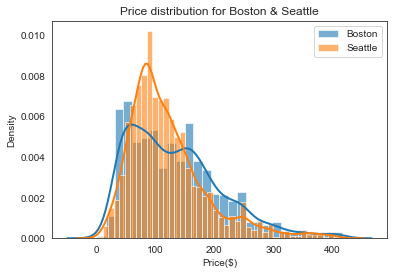

In [39]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df_combine_all['price'].loc[(df_combine_all['City'] == 'Boston')],label='Boston',**kwargs)
sns.distplot(df_combine_all['price'].loc[(df_combine_all['City'] == 'Seattle')],label='Seattle',**kwargs)
plt.legend()
plt.title('Price distribution for Boston & Seattle')
plt.xlabel("Price($)")
plt.ylabel("Density")

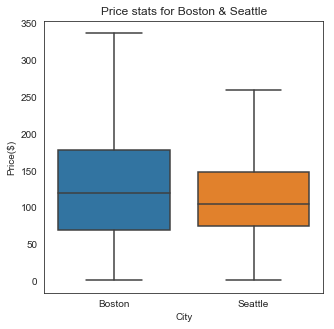

In [51]:
#Box Plot
plt.figure(figsize = (5,5))
sns.boxplot(x=df_combine_all.City, y =df_combine_all.price, data = df_combine_all, showfliers = False)
plt.title('Price stats for Boston & Seattle')
plt.xlabel("City")
plt.ylabel("Price($)")
plt.show()


*Disprsion for Boston City is Highest*

In [50]:
#Tabular Data for both cities
b = pd.DataFrame(df_combine_all['price'].loc[(df_combine_all['City'] == 'Boston')].describe())
a = pd.DataFrame(df_combine_all['price'].loc[(df_combine_all['City'] == 'Seattle')].describe())

price_comp = pd.concat([a,b], axis = 1,keys = ['Seattle','Boston'])
price_comp

,Seattle,Boston
,price,price
count,3973.000000,2886.000000
mean,120.402718,133.242550
std,66.928878,78.492403
min,1.000000,1.000000
25%,75.000000,70.000000
50%,105.000000,120.000000
75%,149.000000,178.000000
max,421.000000,416.000000


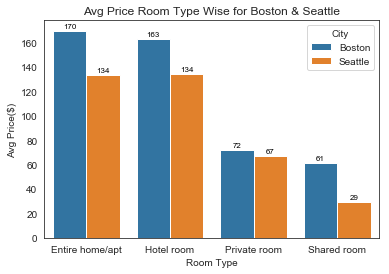

In [45]:

def Avg_Bol(x):
    tot = len(x)
    sum1 = 0
    for i in x:
        if i == True:
            sum1 = sum1 + 1
    
    return (sum1/tot)

def Availabilty_365_Per(x):
    ct = len(x)
    su = sum(x)
    rt = su / (ct * 365)
    return rt

Grp1 = df_combine_all.groupby(['City','room_type'],as_index=False).agg({
                                                            'id' : 'count',
                                                            'price':'mean',
                                                            'host_response_rate':'mean',
                                                            'host_acceptance_rate': 'mean',
                                                            'host_is_superhost':Avg_Bol,
                                                            'has_availability': Avg_Bol,
                                                            'availability_365': Availabilty_365_Per,
                                                            'number_of_reviews':['mean','sum'],
                                                            'number_of_reviews_ltm':'mean',
                                                            'review_scores_rating':'mean',
                                                            'review_scores_accuracy':'mean',
                                                            'review_scores_cleanliness':'mean',
                                                            'review_scores_checkin':'mean',
                                                            'review_scores_communication':'mean',
                                                            'review_scores_location':'mean',
                                                            'review_scores_value':'mean',
                                                            'instant_bookable':Avg_Bol,
                                                            'HostExperience':'mean',

                                                            }).round(2)

Grp1.columns = ['City',
                'room_type',
                'Property Count',
                'Avg Price',
                'Avg_host_response_rate',
                'Avg_host_acceptance_rate',
                'Per_Super Host Property',
                'Per Available Prop',
                'Inventory 365',
                'Avg Review Ct Per Property',
                'Total Reviews',
                'Avg Review LTM Ct Per Property',
                'Avg review_scores_rating',
                'Avg review_scores_accuracy',
                'Avg review_scores_cleanliness',
                'Avg review_scores_checkin',
                'Avg review_scores_communication',
                'Avg review_scores_location',
                'Avg review_scores_value',
                'Per Instant Book Property',
                'Avg Host exp (in Yrs)'
                ]

chart = sns.barplot(x="room_type", y="Avg Price", hue = 'City', data=Grp1)
plt.title('Avg Price Room Type Wise for Boston & Seattle')
plt.xlabel("Room Type")
plt.ylabel("Avg Price($)")


# label points on the plot
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

*1. For Seattle City Avg Price for Entire Apartment and Hotel Room is same, whereas for Boston City there Entire home cost ~5% high price* 
*2. There is no significant price difference for Private room*

**For Property Type , We have created a file that contains grouping**

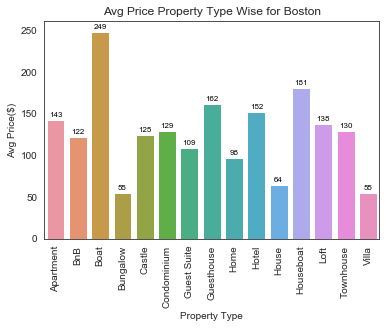

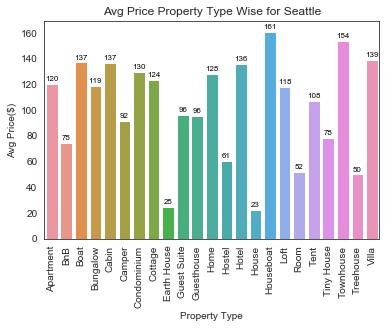

In [52]:
df_prop_map = pd.read_excel(r'PropGroup.xlsx')


df_combine_all = df_combine_all.merge(df_prop_map, left_on = 'property_type', right_on = 'proptype', how = 'left')

df_combine_all.drop('proptype', axis = 1, inplace = True)

Grp2 = df_combine_all.groupby(['City','propgroup'],as_index=False).agg({
                                                            'id' : 'count',
                                                            'price':'mean',
                                                            'host_response_rate':'mean',
                                                            'host_acceptance_rate': 'mean',
                                                            'host_is_superhost':Avg_Bol,
                                                            'has_availability': Avg_Bol,
                                                            'availability_365': Availabilty_365_Per,
                                                            'number_of_reviews':['mean','sum'],
                                                            'number_of_reviews_ltm':'mean',
                                                            'review_scores_rating':'mean',
                                                            'review_scores_accuracy':'mean',
                                                            'review_scores_cleanliness':'mean',
                                                            'review_scores_checkin':'mean',
                                                            'review_scores_communication':'mean',
                                                            'review_scores_location':'mean',
                                                            'review_scores_value':'mean',
                                                            'instant_bookable':Avg_Bol,
                                                            'HostExperience':'mean',

                                                            }).round(2)

Grp2.columns = ['City',
                'Property Type',
                'Property Count',
                'Avg Price',
                'Avg_host_response_rate',
                'Avg_host_acceptance_rate',
                'Per_Super Host Property',
                'Per Available Prop',
                'Inventory 365',
                'Avg Review Ct Per Property',
                'Total Reviews',
                'Avg Review LTM Ct Per Property',
                'Avg review_scores_rating',
                'Avg review_scores_accuracy',
                'Avg review_scores_cleanliness',
                'Avg review_scores_checkin',
                'Avg review_scores_communication',
                'Avg review_scores_location',
                'Avg review_scores_value',
                'Per Instant Book Property',
                'Avg Host exp (in Yrs)'
                ]

chart = sns.barplot(x="Property Type", y="Avg Price", data=Grp2.loc[Grp2['City'] == 'Boston'])
plt.title('Avg Price Property Type Wise for Boston')
plt.xlabel("Property Type")
plt.ylabel("Avg Price($)")
plt.xticks(rotation=90)


# label points on the plot
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()


chart = sns.barplot(x="Property Type", y="Avg Price", data=Grp2.loc[Grp2['City'] == 'Seattle'])
plt.title('Avg Price Property Type Wise for Seattle')
plt.xlabel("Property Type")
plt.ylabel("Avg Price($)")
plt.xticks(rotation=90)


# label points on the plot
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()


*Dispersion on Type of Property is high in seattle compared to Boston*
*Top Property type for Boston is Boat (Avg Price 249) and Houseboat for Seattle (Avg Price 161)*

**Long Stay vs Short Stay**

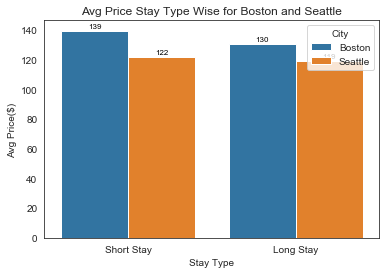

In [53]:
bins = [0,7,np.inf]
names = ['Short Stay', 'Long Stay']

df_combine_all['stay_type_property'] = pd.cut(df_combine_all['minimum_nights'], bins, labels=names)



Grp3 = df_combine_all.groupby(['City','stay_type_property'],as_index=False).agg({
                                                            'id' : 'count',
                                                            'price':'mean',
                                                            'host_response_rate':'mean',
                                                            'host_acceptance_rate': 'mean',
                                                            'host_is_superhost':Avg_Bol,
                                                            'has_availability': Avg_Bol,
                                                            'availability_365': Availabilty_365_Per,
                                                            'number_of_reviews':['mean','sum'],
                                                            'number_of_reviews_ltm':'mean',
                                                            'review_scores_rating':'mean',
                                                            'review_scores_accuracy':'mean',
                                                            'review_scores_cleanliness':'mean',
                                                            'review_scores_checkin':'mean',
                                                            'review_scores_communication':'mean',
                                                            'review_scores_location':'mean',
                                                            'review_scores_value':'mean',
                                                            'instant_bookable':Avg_Bol,
                                                            'HostExperience':'mean',

                                                            }).round(2)

Grp3.columns = ['City',
                'Stay Type',
                'Property Count',
                'Avg Price',
                'Avg_host_response_rate',
                'Avg_host_acceptance_rate',
                'Per_Super Host Property',
                'Per Available Prop',
                'Inventory 365',
                'Avg Review Ct Per Property',
                'Total Reviews',
                'Avg Review LTM Ct Per Property',
                'Avg review_scores_rating',
                'Avg review_scores_accuracy',
                'Avg review_scores_cleanliness',
                'Avg review_scores_checkin',
                'Avg review_scores_communication',
                'Avg review_scores_location',
                'Avg review_scores_value',
                'Per Instant Book Property',
                'Avg Host exp (in Yrs)'
                ]

chart = sns.barplot(x="Stay Type", y="Avg Price" , hue = 'City', data=Grp3)
plt.title('Avg Price Stay Type Wise for Boston and Seattle')
plt.xlabel("Stay Type")
plt.ylabel("Avg Price($)")



# label points on the plot
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

*Gap between the prices for Long Stay vs Short Stay (Less than 7 Nights) is more in Boston are compara more cheaper than Seattle**

## Seasonality is impacting Pricing and Inventory Availability for both cities

**Data Pre-Processing**

In [55]:
#Reading Calender Data
df_cal_boston = pd.read_csv(r'Boston Data\calendar.csv.gz', compression = 'gzip',error_bad_lines=False)

df_cal_seattle= pd.read_csv(r'Seattle Data\calendar (1).csv.gz', compression = 'gzip',error_bad_lines=False)

df_cal_boston['City'] = 'Boston'
df_cal_seattle['City'] = 'Seattle'

#Combining Data
df_combine_cal = df_cal_boston.append(df_cal_seattle)

**Data Cleaning**

In [56]:
d = {'t': 1, 'f': 0}
df_combine_cal['available'] = df_combine_cal['available'].map(d)

df_combine_cal['price'] = df_combine_cal['price'].str.replace('$','')
df_combine_cal['price'] = df_combine_cal['price'].str.replace(',','')
df_combine_cal['price'] = df_combine_cal['price'].str.replace('.00','')
df_combine_cal['price'] = pd.to_numeric(df_combine_cal['price'])

In [58]:
#Grouping data at City and Date Level
Grp4 = df_combine_cal.groupby(['City','date'],as_index=False).agg({
                                                            'available' : 'mean',
                                                            'price':'mean'                                                   
                                                            }).round(2)

Grp4['date'] = pd.to_datetime(Grp4['date'])
Grp4['Year'] = Grp4.date.dt.year
Grp4['Month'] = Grp4.date.dt.month
Grp4['Weekday Name'] = Grp4.date.dt.weekday_name

In [59]:
#Boston Data
Grp41 = Grp4.loc[Grp4['City'] == 'Boston']
data_columns = ['available', 'price']

#Setting Date Column as Index
Grp41 = Grp41.set_index('date')
Grp41_monthly_mean = Grp41[data_columns].resample('M').mean()

#Seattle Data
Grp42 = Grp4.loc[Grp4['City'] == 'Seattle']
data_columns = ['available', 'price']

#Setting Date Column as Index
Grp42 = Grp42.set_index('date')
Grp42_monthly_mean = Grp42[data_columns].resample('M').mean()

**Availabilty Seasonality**

(array([737942., 737972., 738003., 738034., 738064., 738095., 738125.,
        738156., 738187., 738215., 738246.]),
 <a list of 11 Text xticklabel objects>)

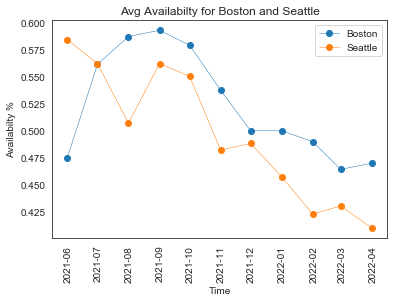

In [61]:
#Subsetting Data and Plotting
start, end1 = '2021-05', '2022-03'
plt.rc('font', size=10)
fig, ax = plt.subplots()
ax.plot(Grp41_monthly_mean.loc[start:end1, 'available'], marker = 'o', linestyle = '-', linewidth = 0.5, label = 'Boston')
ax.plot(Grp42_monthly_mean.loc[start:end1, 'available'], marker = 'o', linestyle = '-', linewidth = 0.5, label = 'Seattle')
ax.set_xlabel('Time')
ax.set_ylabel('Availabilty %')
ax.legend(loc='upper right')
plt.title('Avg Availabilty for Boston and Seattle')
plt.xticks(rotation=90)

**Price Seasonality**

(array([737942., 737972., 738003., 738034., 738064., 738095., 738125.,
        738156., 738187., 738215., 738246.]),
 <a list of 11 Text xticklabel objects>)

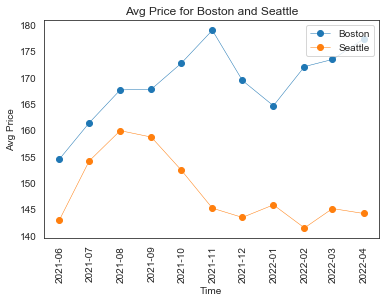

In [62]:
plt.rc('font', size=10)
fig, ax = plt.subplots()

# Specify how our lines should look
#ax.plot(Grp41.loc[start:end, 'available'], marker = '.', linestyle = '-', linewidth = 0.5, label = 'Daily')
ax.plot(Grp41_monthly_mean.loc[start:end1, 'price'], marker = 'o', linestyle = '-', linewidth = 0.5, label = 'Boston')
ax.plot(Grp42_monthly_mean.loc[start:end1, 'price'], marker = 'o', linestyle = '-', linewidth = 0.5, label = 'Seattle')
ax.set_xlabel('Time')
ax.set_ylabel('Avg Price')
ax.legend(loc='upper right')
plt.title('Avg Price for Boston and Seattle')
plt.xticks(rotation=90)


## Impact of High Value Amenities ##

In [63]:
#Boston
df_amenities_boston = pd.DataFrame(columns = ['Amenities','PropID','Price'])

def melting(x):
    global df_amenities_boston
    y =  x['amenities']
    y = y.replace('[','')
    y = y.replace(']','')
    y = y.replace('"','')
    y = pd.DataFrame(y.split(","), columns = ['Amenities'])
    y['PropID'] = x['id']
    y['Price'] = x['price']
    df_amenities_boston = df_amenities_boston.append(y)

df_combine_all.loc[(df_combine_all['City'] == 'Boston')].apply(melting, axis=1)
df_amenities_boston['City'] = 'Boston'    

In [64]:
#Seattle
df_amenities_seattle = pd.DataFrame(columns = ['Amenities','PropID','Price'])

def melting(x):
    global df_amenities_seattle
    
    y =  x['amenities']
    y = y.replace('[','')
    y = y.replace(']','')
    y = y.replace('"','')
    y = pd.DataFrame(y.split(","), columns = ['Amenities'])
    y['PropID'] = x['id']
    y['Price'] = x['price']
    df_amenities_seattle = df_amenities_seattle.append(y)
         

df_combine_all.loc[(df_combine_all['City'] == 'Seattle')].apply(melting, axis=1)
df_amenities_seattle['City'] = 'Seattle'

In [65]:
#Top 10 Percentile of Amenities (Boston) whose Avg Price is greater than Avg Price
Grp5 = df_amenities_boston.groupby(['Amenities'],as_index=False).agg({
                                                            'PropID' : 'nunique',
                                                            'Price':'mean'                                                         
                                                            }).round(2)
boston_price_mean = np.mean(df_combine_all.loc[(df_combine_all['City'] == 'Boston')]['price'])
Grp51 = Grp5.loc[(Grp5['Price'] > 1.1*boston_price_mean) & (Grp5['PropID'] > Grp5['PropID'].quantile(0.9) )]
Grp51

,Amenities,PropID,Price
45,Bed linens,1794,146.59
64,Cable TV,782,147.21
101,Dishwasher,993,155.73
115,Extra pillows and blankets,1204,150.02
172,Lockbox,658,159.20
224,Private entrance,906,163.49
248,Shower gel,608,174.67


In [67]:
#Top 10 Percentile of Amenities (Seattle) whose Avg Price is greater than Avg Price
Grp6 = df_amenities_seattle.groupby(['Amenities'],as_index=False).agg({
                                                            'PropID' : 'nunique',
                                                            'Price':'mean'                                                         

                                                            }).round(2)

seattle_price_mean = np.mean(df_combine_all.loc[(df_combine_all['City'] == 'Seattle')]['price'])
Grp61 = Grp6.loc[(Grp6['Price'] > 1.1*seattle_price_mean) & (Grp6['PropID'] > Grp6['PropID'].quantile(0.9) )]
Grp61


,Amenities,PropID,Price
70,Air conditioning,1363,137.09
93,BBQ grill,775,144.10
105,Bathtub,999,141.24
135,Cable TV,1056,137.37
141,Children\u2019s books and toys,319,143.17
189,Dishwasher,1909,140.47
217,Elevator,758,138.89
219,Ethernet connection,343,137.38
289,Gym,689,146.67
302,High chair,260,166.81


## Neighbourhoods which are getting high reviews but there is shortage of inventory leading to increase in price.

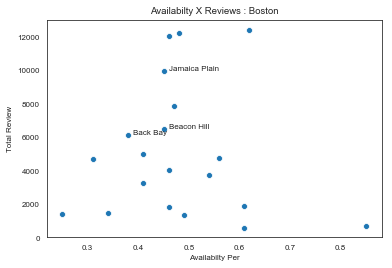

In [71]:
#Boston City
Grp7 = df_combine_all.groupby(['City','neighbourhood_cleansed'],as_index=False).agg({
                                                            'id' : 'count',
                                                            'availability_365': Availabilty_365_Per,
                                                            'number_of_reviews':['mean','sum']
                                                            }).round(2)

Grp7.columns = ['City','Neighbourhood','Prop Count','Availabilty Per','Review Per Prop','Total Review']


Grp71 = Grp7.loc[Grp7['City'] == 'Boston']
Grp71 = Grp71.loc[Grp7['Prop Count'] > Grp71['Prop Count'].quantile(0.2)]


ax = sns.scatterplot(data=Grp71, x="Availabilty Per", y="Total Review")
plt.title('Availabilty X Reviews : Boston')
plt.rcParams.update({'font.size': 8})
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    x_mean = np.mean(x) *0.95
#    print(x_mean)
    y_mean = np.mean(y) 
#    print(y_mean)
    for i, point in a.iterrows():
        if (float(point['x']) < x_mean) and (float(point['y']) > y_mean):
 #           print(point['x'])
            ax.text(point['x']+.01, point['y'], str(point['val']))
        

label_point(Grp71['Availabilty Per'], Grp71['Total Review'], Grp71['Neighbourhood'], plt.gca())  



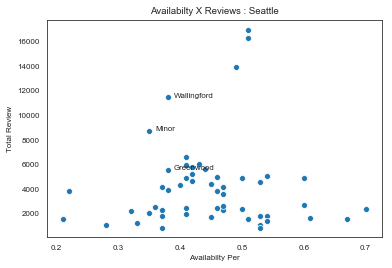

In [73]:
#Seattle Data
Grp72 = Grp7.loc[Grp7['City'] == 'Seattle']
Grp72 = Grp72.loc[Grp7['Prop Count'] > Grp72['Prop Count'].quantile(0.4)]


ax2 = sns.scatterplot(data=Grp72, x="Availabilty Per", y="Total Review")
plt.title('Availabilty X Reviews : Seattle')
plt.rcParams.update({'font.size': 8})
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    x_mean = np.mean(x) * 0.9
#    print(x_mean)
    y_mean = np.mean(y) * 1.3
#    print(y_mean)
    for i, point in a.iterrows():
        if (float(point['x']) < x_mean) and (float(point['y']) > y_mean):
#            print(point['x'])
            ax.text(point['x']+.01, point['y'], str(point['val']))
        

label_point(Grp72['Availabilty Per'], Grp72['Total Review'], Grp72['Neighbourhood'], plt.gca())  


## Modeling - Predicting Price ##

**Boston City** Using Linear Regression Technique

In [74]:
df_boston = df_combine_all.loc[df_combine_all['City'] == 'Boston']

**Handling Null Values**

In [75]:
df_boston['host_response_rate'].fillna(np.mean(df_boston['host_response_rate']),inplace = True)
df_boston['host_acceptance_rate'].fillna(np.mean(df_boston['host_acceptance_rate']),inplace = True)
df_boston['host_is_superhost'].fillna(False,inplace = True)
df_boston['host_listings_count'].fillna(1,inplace = True)
df_boston['HostExperience'].fillna(1,inplace = True)
df_boston['beds'].fillna(1,inplace = True)

#Dropping Columns because most of the values were NAN
df_boston.drop(['City','property_type','amenities','name','host_name','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','bedrooms','host_id','id','neighbourhood_cleansed'], axis =1, inplace = True)

df_boston.isna().mean()*100

host_response_rate       0.0
host_acceptance_rate     0.0
host_is_superhost        0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
maximum_nights           0.0
has_availability         0.0
availability_365         0.0
number_of_reviews        0.0
number_of_reviews_ltm    0.0
instant_bookable         0.0
host_listings_count      0.0
accommodates             0.0
beds                     0.0
HostExperience           0.0
propgroup                0.0
stay_type_property       0.0
dtype: float64

In [76]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [77]:
cat_df = df_boston.select_dtypes(include=['object','category'])
num_df = df_boston.select_dtypes(include = ['float64','int64','bool'])
cat_df = create_dummy_df(cat_df, cat_df.columns, False)
df_boston = pd.concat([cat_df,num_df],axis = 1)

In [78]:
x = df_boston[['room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'propgroup_BnB', 'propgroup_Boat',
       'propgroup_Bungalow', 'propgroup_Castle', 'propgroup_Condominium',
       'propgroup_Guest Suite', 'propgroup_Guesthouse', 'propgroup_Home',
       'propgroup_Hotel', 'propgroup_House', 'propgroup_Houseboat',
       'propgroup_Loft', 'propgroup_Townhouse', 'propgroup_Villa',
       'stay_type_property_Long Stay', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'latitude', 'longitude',
        'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'instant_bookable', 'host_listings_count', 'accommodates', 'beds',
       'HostExperience']]

y = df_boston[['price']]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.5708085560838723 on 866 values.'

In [82]:
# get importance
importance = lm_model.coef_
df_feature_imp = pd.DataFrame(columns = ['Feature','Importance'])
# summarize feature importance
for i,v in enumerate(importance[0]):
    b = {'Feature':[x.columns[i]],'Importance':[v]}
    d = pd.DataFrame.from_dict(b)
    df_feature_imp = df_feature_imp.append(d)
    
df_feature_imp

,Feature,Importance
0,room_type_Hotel room,-37.463373
0,room_type_Private room,-54.825665
0,room_type_Shared room,-76.103588
0,propgroup_BnB,16.205361
0,propgroup_Boat,76.330784
0,propgroup_Bungalow,0.636986
0,propgroup_Castle,-18.590919
0,propgroup_Condominium,-3.371368
0,propgroup_Guest Suite,-12.915866
0,propgroup_Guesthouse,35.975623


**Seattle City** Using Linear Regression Technique

In [83]:
df_seattle = df_combine_all.loc[df_combine_all['City'] == 'Seattle']

**Handling Null Values**

In [84]:
df_seattle['host_response_rate'].fillna(np.mean(df_seattle['host_response_rate']),inplace = True)
df_seattle['host_acceptance_rate'].fillna(np.mean(df_seattle['host_acceptance_rate']),inplace = True)
df_seattle['host_is_superhost'].fillna(False,inplace = True)
df_seattle['host_listings_count'].fillna(1,inplace = True)
df_seattle['HostExperience'].fillna(1,inplace = True)
df_seattle['beds'].fillna(1,inplace = True)

#Dropping Columns because most of the values were NAN
df_seattle.drop(['City','property_type','amenities','name','host_name','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','bedrooms','host_id','id','neighbourhood_cleansed'], axis =1, inplace = True)

df_seattle.isna().mean()*100

host_response_rate       0.0
host_acceptance_rate     0.0
host_is_superhost        0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
maximum_nights           0.0
has_availability         0.0
availability_365         0.0
number_of_reviews        0.0
number_of_reviews_ltm    0.0
instant_bookable         0.0
host_listings_count      0.0
accommodates             0.0
beds                     0.0
HostExperience           0.0
propgroup                0.0
stay_type_property       0.0
dtype: float64

In [85]:
cat_df = df_seattle.select_dtypes(include=['object','category'])
num_df = df_seattle.select_dtypes(include = ['float64','int64','bool'])
cat_df = create_dummy_df(cat_df, cat_df.columns, False)
df_seattle = pd.concat([cat_df,num_df],axis = 1)

In [86]:
x = df_seattle[['room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'propgroup_BnB', 'propgroup_Boat',
       'propgroup_Bungalow', 'propgroup_Cabin', 'propgroup_Camper',
       'propgroup_Condominium', 'propgroup_Cottage', 'propgroup_Earth House',
       'propgroup_Guest Suite', 'propgroup_Guesthouse', 'propgroup_Home',
       'propgroup_Hostel', 'propgroup_Hotel', 'propgroup_House',
       'propgroup_Houseboat', 'propgroup_Loft', 'propgroup_Room',
       'propgroup_Tent', 'propgroup_Tiny House', 'propgroup_Townhouse',
       'propgroup_Treehouse', 'propgroup_Villa',
       'stay_type_property_Long Stay', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'latitude', 'longitude',
        'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'instant_bookable', 'host_listings_count', 'accommodates', 'beds',
       'HostExperience']]

y = df_seattle[['price']]

In [87]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model_s = LinearRegression(normalize=True) # Instantiate
lm_model_s.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model_s.predict(X_test) 
#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for your model was 0.5131024399268451 on 1192 values.'

In [89]:
# get importance
importance = lm_model.coef_
df_feature_imp_s = pd.DataFrame(columns = ['Feature','Importance'])
# summarize feature importance
for i,v in enumerate(importance[0]):
    b = {'Feature':[x.columns[i]],'Importance':[v]}
    d = pd.DataFrame.from_dict(b)
    df_feature_imp_s = df_feature_imp_s.append(d)

df_feature_imp_s

,Feature,Importance
0,room_type_Hotel room,-37.463373
0,room_type_Private room,-54.825665
0,room_type_Shared room,-76.103588
0,propgroup_BnB,16.205361
0,propgroup_Boat,76.330784
0,propgroup_Bungalow,0.636986
0,propgroup_Cabin,-18.590919
0,propgroup_Camper,-3.371368
0,propgroup_Condominium,-12.915866
0,propgroup_Cottage,35.975623
